# Problem Statement
Lending Club, a consumer finance marketplace, faces challenges in managing its loan approval process. The main issue is minimizing credit losses from borrowers who default on loans, labeled as "Charged-Off." The goal is to identify applicants likely to repay their loans to reduce financial losses.

# Objectives
The objective is to pinpoint applicants at risk of defaulting on loans through exploratory data analysis (EDA). By understanding the key factors that drive loan defaults, Lending Club can improve its risk assessment and decision-making processes.

##### Importing the libraries

In [3]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [6]:
# load the dataset and convert into dataframe
loan_df = pd.read_csv("loan.csv")

# 1. Understanding the Dataset
The dataset contains information about previous loan applicants and their loan status. The analysis will focus on identifying patterns that indicate the likelihood of default, which can inform decisions on loan approvals, amounts, and interest rates.

## 1.2. Dataset Attributes

### Primary Attribute
- **Loan Status (loan_status)**: 
  - **Fully Paid**: Loans that have been successfully repaid.
  - **Charged-Off**: Loans that have defaulted.
  - **Current**: Loans that are still in progress (excluded from analysis).

### Consumer Attributes
- **Annual Income (annual_inc)**: Higher income may increase the chances of loan approval.
- **Home Ownership (home_ownership)**: Owning a home can enhance the likelihood of approval.
- **Employment Length (emp_length)**: Longer employment tenure indicates greater financial stability.
- **Debt to Income (dti)**: A lower DTI suggests a higher chance of loan approval.
- **State (addr_state)**: The borrower's location may reveal trends in default rates.

### Loan Attributes
- **Loan Amount (loan_amnt)**: The amount of money requested by the borrower.
- **Grade (grade)**: A rating assigned to the borrower based on their creditworthiness.
- **Term (term)**: The duration of the loan, typically expressed in months.
- **Issue Date (issue_d)**: The date when the loan was approved.
- **Purpose of Loan (purpose)**: The reason for which the borrower is seeking the loan.
- **Interest Rate (int_rate)**: The annual interest charged on the loan amount.

### Excluded Columns
Certain columns related to customer behavior and highly granular data will not be included in the analysis.

In [10]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
(loan_df.columns).tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

# Data Cleaning

## 1. Data Types
### Numeric Data Types
- `loan_amnt`
- `funded_amnt`
- `funded_amnt_inv`
- `installment`
- `annual_inc`
- `dti`
- `pub_rec_bankruptcies`

### Categorical Data Types
- `term`
- `int_rate`
- `grade`
- `emp_length`
- `home_ownership`
- `verification_status`
- `loan_status`
- `purpose`
- `addr_state`

### Time and Date Data Types
- `issue_d`

### To check if there is any headers/footers or summary details rows are there and delete it.

In [18]:
loan_df.shape

(39717, 111)

In [20]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [22]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#To check is there is unnessary rows or not.
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

As we know that the current status of loan indicates that the loan is currently in progress so we cannot include it in our analysis.

In [27]:
loan_df = loan_df[loan_df['loan_status']!='Current']

In [29]:
loan_df.shape

(38577, 111)

In [31]:
# Check if there is any duplicate rows.
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


## Delete the Uneccessary columns

In [34]:
loan_df.shape

(38577, 111)

In [36]:
#check the percentage of null values in the columns
null_percentage = loan_df.isnull().mean() * 100
null_percentage

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [38]:
len(null_percentage[null_percentage == 100])

55

##### as we can clearly see there are columns having 100% null values so it's better to delete those columns as these columns will not help in our analysis 
##### since we have 55 columns which have 100% null values so delete them

In [41]:
# Identify columns where the null percentage is 100%
columns_to_drop = null_percentage[null_percentage == 100].index

# Drop those columns from the DataFrame
loan_df.drop(columns=columns_to_drop, inplace=True)

In [43]:
# check the updated df
loan_df.shape

(38577, 56)

In [45]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [47]:
#check the percentage of null values in the columns
null_percentage = loan_df.isnull().mean() * 100
null_percentage

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.477901
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [49]:
# Identify columns where the null percentage is more than 50%
columns_to_drop = null_percentage[null_percentage > 50].index

# Drop those columns from the DataFrame
loan_df.drop(columns=columns_to_drop, inplace=True)

In [51]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


Columns like id, member_id, and url serve as unique identifiers and do not provide any relevant information for analyzing loan performance or borrower risk, making them unnecessary for meaningful data analysis in our case study.

In [54]:
# deleting member_id, zip_code and url columns
loan_df.drop(columns=['id', 'member_id', 'zip_code', 'url'], axis=1, inplace=True)

In [56]:
loan_df.shape

(38577, 50)

In [58]:
loan_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Now, delete columns like title and desc as they are not needed for our analysis because they do not provide relevant information for our case study.

In [61]:
# delete columns like title and desc
loan_df.drop(columns = ['desc', 'title'], axis=1, inplace=True)

In [63]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [65]:
loan_df.shape

(38577, 48)

It is necessary to limit our analysis till grade level only as sub_grade is not much relevance in our analysis

In [68]:
loan_df.drop(['sub_grade'], axis=1, inplace=True)

In [70]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [72]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Behavioral data will be gathered only after the loan approval, making it unavailable during the approval process. Thus, it is better to delete the behavioral columns.

In [75]:
behavioural_cols = ['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']


In [77]:
loan_df.drop(behavioural_cols, axis=1, inplace=True)

In [79]:
loan_df.shape

(38577, 26)

In [81]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
int_rate                        370
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                   15022
emp_title                     28027
dtype: int64

As it has been seen clearly that there are columns which have only one unique value so its better to drop these columns

In [84]:
loan_df.drop(columns= ['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq'
,'policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1, inplace=True)

In [86]:
loan_df.shape

(38577, 18)

In [88]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


In [90]:
# The emp_title column can be eliminated since it contains textual descriptions that do not contribute to the exploratory data analysis (EDA).
loan_df.drop(['emp_title'], axis=1, inplace=True)

In [92]:
loan_df.shape

(38577, 17)

## 2. Data Conversion

In [95]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [97]:
loan_df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [99]:
# Convert term to int (extract numeric value)
loan_df['term'] = loan_df['term'].str.replace(' months', '').astype(int)

In [101]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.0,36,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.0,36,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.0,36,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


In [103]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [105]:
# Convert int_rate to float (remove percentage sign)
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%', '').astype(float)

In [107]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


In [109]:
loan_df['loan_amnt'].value_counts()

loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: count, Length: 870, dtype: int64

In [111]:
loan_df['funded_amnt'].value_counts()

funded_amnt
10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
1650        1
30100       1
19675       1
21275       1
22350       1
Name: count, Length: 1019, dtype: int64

In [113]:
# Convert the column loan_amnt and funded_amnt as float64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


In [115]:
# check the grade data type
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [117]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [119]:
# Ensure all values are treated as strings, then replace and extract
loan_df['emp_length'] = (
    loan_df['emp_length']
    .astype(str)  # Ensure all values are strings
    .replace({'10+ years': '10', '< 1 year': '0', '1 year': '1'})
    .str.extract('(\d+)')[0]  # Extract digits
)

# Convert the extracted values to integers
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'])

In [121]:
loan_df['emp_length']

0        10.0
1         0.0
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 38577, dtype: float64

In [123]:
# Rounding columns
loan_df['loan_amnt'] = loan_df['loan_amnt'].round(2)  # Rounding to nearest integer
loan_df['funded_amnt'] = loan_df['funded_amnt'].round(2)  # Rounding to 2 decimal places
loan_df['funded_amnt_inv'] = loan_df['funded_amnt_inv'].round(2)  # Rounding to 2 decimal places
loan_df['int_rate'] = loan_df['int_rate'].round(2)  # Rounding to 1 decimal place
loan_df['dti'] = loan_df['dti'].round(2)  # Rounding to 2 decimal place

for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[c] = loan_df[c].apply(lambda x: round(x,2))
    print(loan_df[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [125]:
loan_df['issue_d'].value_counts()

issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

### Converting dates to datetime format enables date arithmetic, filtering, sorting, and visualization, ensures consistency, supports time zone handling, and enhances compatibility with data analysis libraries, facilitating effective data manipulation and analysis.

In [128]:
# Convert 'issue_d' to datetime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [130]:
loan_df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
39712,2500.0,2500.0,1075.0,36,8.07,78.42,A,4.0,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500.0,8500.0,875.0,36,10.28,275.38,C,3.0,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,NaN
39714,5000.0,5000.0,1325.0,36,8.07,156.84,A,0.0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000.0,5000.0,650.0,36,7.43,155.38,A,0.0,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,NaN
39716,7500.0,7500.0,800.0,36,13.75,255.43,E,0.0,OWN,22000.0,Not Verified,2007-06-01,Fully Paid,debt_consolidation,MA,14.29,NaN


In [132]:
loan_df.isnull().mean() * 100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

### 3. Dropping/Imputing the rows.

as the null values percentage in the columns emp_length and pub_rec_bankruptcies is below 5% so it is good practice to delete them

In [136]:
loan_df = loan_df[loan_df['emp_length'].notna()] 

In [138]:
loan_df['emp_length'].isnull().sum()

0

In [140]:
# Drop rows where 'pub_rec_bankruptcies' is null
loan_df = loan_df.dropna(subset=['pub_rec_bankruptcies'])

In [142]:
loan_df.shape

(36847, 17)

In [144]:
loan_df.isnull().mean() * 100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [146]:
loan_df.isna().mean() * 100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

### 4. Derived Columns

In [149]:
# Create derived columns for issue month and issue year
loan_df['issue_month'] = loan_df['issue_d'].dt.month
loan_df['issue_year'] = loan_df['issue_d'].dt.year

In [151]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,12,2011
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,12,2011
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,12,2011
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,12,2011
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800.0,4800.0,1100.0,36,10.28,155.52,C,1.0,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,VA,7.51,1.0,11,2007
39573,7000.0,7000.0,1000.0,36,10.59,227.82,C,3.0,MORTGAGE,63500.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,AZ,8.50,1.0,11,2007
39623,9000.0,9000.0,700.0,36,12.49,301.04,D,8.0,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,debt_consolidation,MD,5.08,1.0,10,2007
39666,15450.0,15450.0,600.0,36,11.22,507.46,C,2.0,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,debt_consolidation,VA,13.50,1.0,8,2007


In [153]:
loan_df.shape

(36847, 19)

In [155]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_month',
       'issue_year'],
      dtype='object')

### 5. Handling Outliers

#### column_titles
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'

In [161]:
loan_df['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Buketting different variables like loan_amnt, int_rate, dti for better analysis

In [169]:
loan_df.loan_amnt.describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [166]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_bucket'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [171]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,12,2011,0 - 5K
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,12,2011,0 - 5K
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,12,2011,0 - 5K
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,12,2011,5K - 10K
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,12,2011,0 - 5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800.0,4800.0,1100.0,36,10.28,155.52,C,1.0,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,VA,7.51,1.0,11,2007,0 - 5K
39573,7000.0,7000.0,1000.0,36,10.59,227.82,C,3.0,MORTGAGE,63500.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,AZ,8.50,1.0,11,2007,5K - 10K
39623,9000.0,9000.0,700.0,36,12.49,301.04,D,8.0,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,debt_consolidation,MD,5.08,1.0,10,2007,5K - 10K
39666,15450.0,15450.0,600.0,36,11.22,507.46,C,2.0,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,debt_consolidation,VA,13.50,1.0,8,2007,15K - above


In [173]:
loan_df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [175]:
def bucket_int_rate(column):
    if column <= 9:  # 25th percentile
        return '0% - 9%'
    elif (column > 9) and (column <= 11):  # Median
        return '9% - 11%'
    elif (column > 11) and (column <= 13):  
        return '11% - 13%'
    elif (column > 13) and (column <= 15):  # 75th percentile
        return '13% - 15%'
    else:
        return 'Above 15%'  # Capture all values above 15

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [176]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket,int_rate_b
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,...,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,12,2011,0 - 5K,9% - 11%
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,...,2011-12-01,Charged Off,car,GA,1.00,0.0,12,2011,0 - 5K,Above 15%
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,...,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,12,2011,0 - 5K,Above 15%
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,...,2011-12-01,Fully Paid,other,CA,20.00,0.0,12,2011,5K - 10K,13% - 15%
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,...,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,12,2011,0 - 5K,0% - 9%


In [177]:
loan_df['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [181]:
# Assuming df is your DataFrame and 'dti' is the column you want to bucket
bins = [0, 10, 15, 20, 30]  # Define the edges of the bins
labels = ['0-10', '10-15', '15-20', 'Above 20']  # Labels for the bins

# Create the income buckets
loan_df['dti_bucket'] = pd.cut(loan_df['dti'], bins=bins, labels=labels, right=True)

In [183]:
loan_df['dti_bucket']

0        Above 20
1            0-10
2            0-10
3           15-20
5           10-15
           ...   
39562        0-10
39573        0-10
39623        0-10
39666       10-15
39680        0-10
Name: dti_bucket, Length: 36847, dtype: category
Categories (4, object): ['0-10' < '10-15' < '15-20' < 'Above 20']

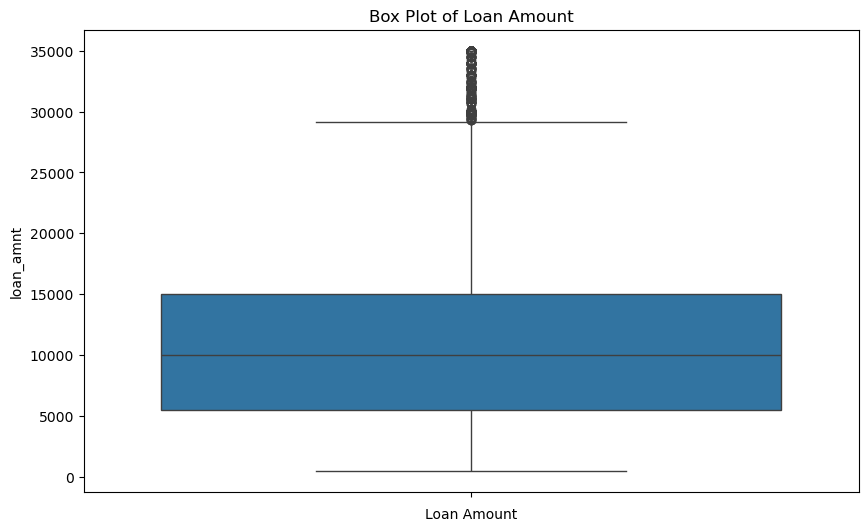

In [185]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

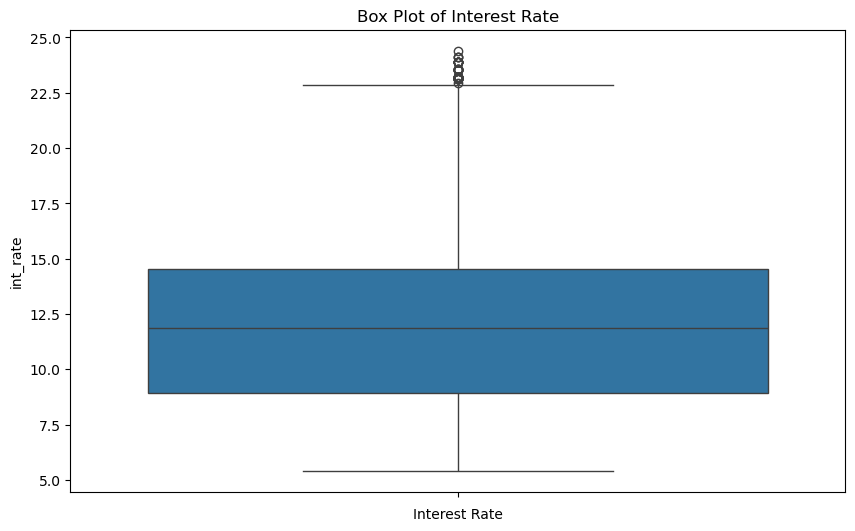

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['int_rate'])
plt.title('Box Plot of Interest Rate')
plt.xlabel('Interest Rate')
plt.show()

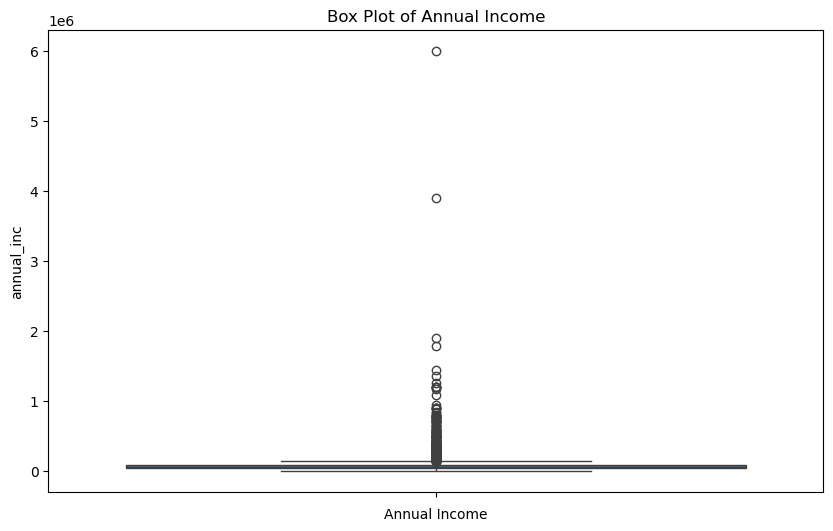

In [189]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

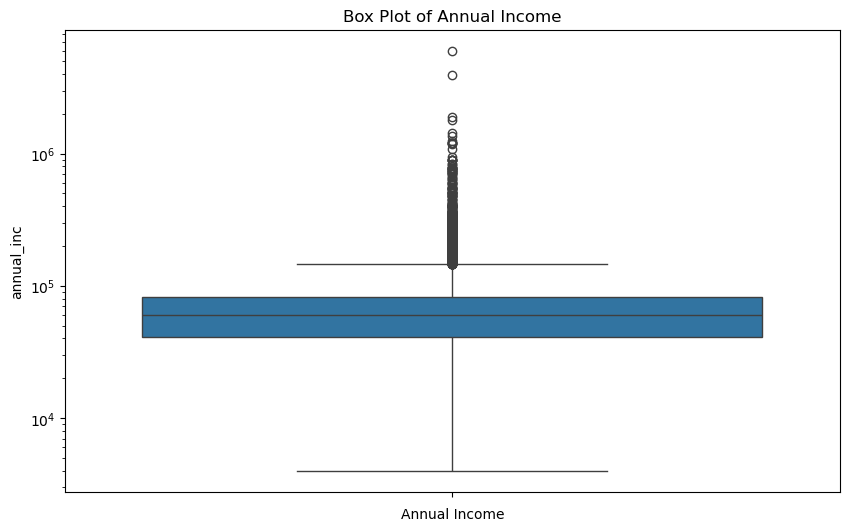

In [190]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(y=loan_df['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.yscale('log') # Add logarithmic scale for y-axis
plt.show()

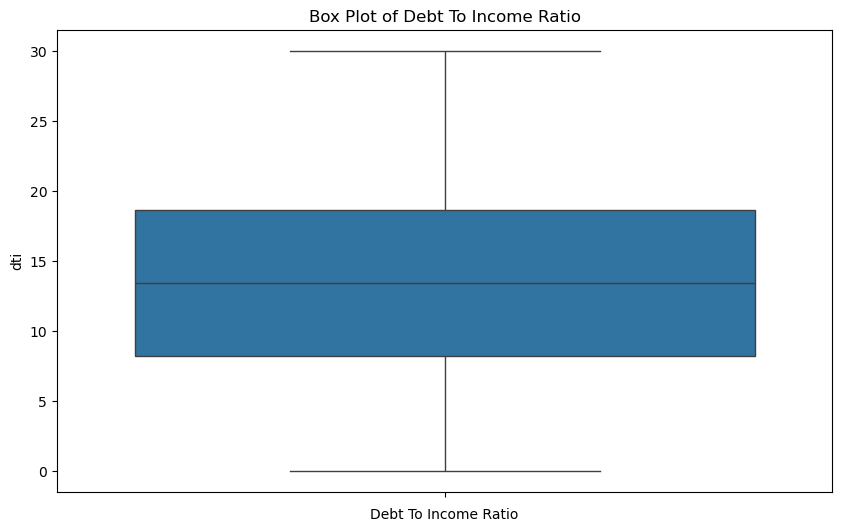

In [191]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['dti'])
plt.title('Box Plot of Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.show()

##### As it has been clearly seeing that 'loan_amnt', 'int_rate', 'annual_inc' have outliers so by using IQR method, we will remove these outliers

In [193]:
# Define the columns to check for outliers
columns_to_check = ['loan_amnt', 'int_rate', 'annual_inc']

# Function to remove outliers using IQR method
def remove_outliers_iqr(loan_df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = loan_df[column].quantile(0.25)
        Q3 = loan_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        loan_df = loan_df[(loan_df[column] >= lower_bound) & (loan_df[column] <= upper_bound)]
    
    return loan_df

# Remove outliers from the specified columns
loan_df = remove_outliers_iqr(loan_df, columns_to_check)

# Optionally, reset the index if needed
loan_df.reset_index(drop=True, inplace=True)

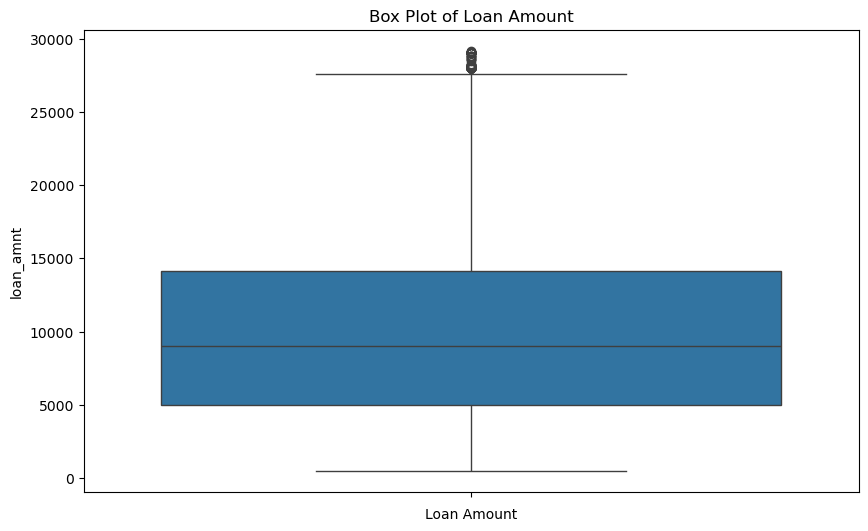

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

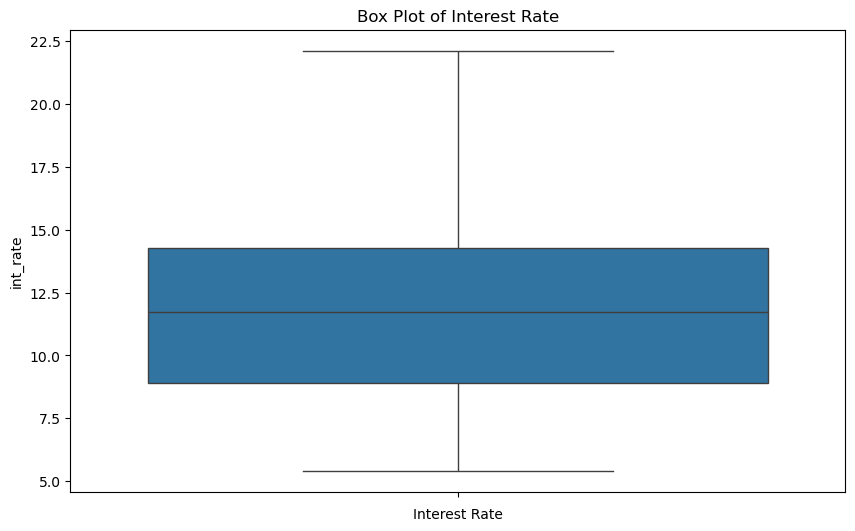

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['int_rate'])
plt.title('Box Plot of Interest Rate')
plt.xlabel('Interest Rate')
plt.show()

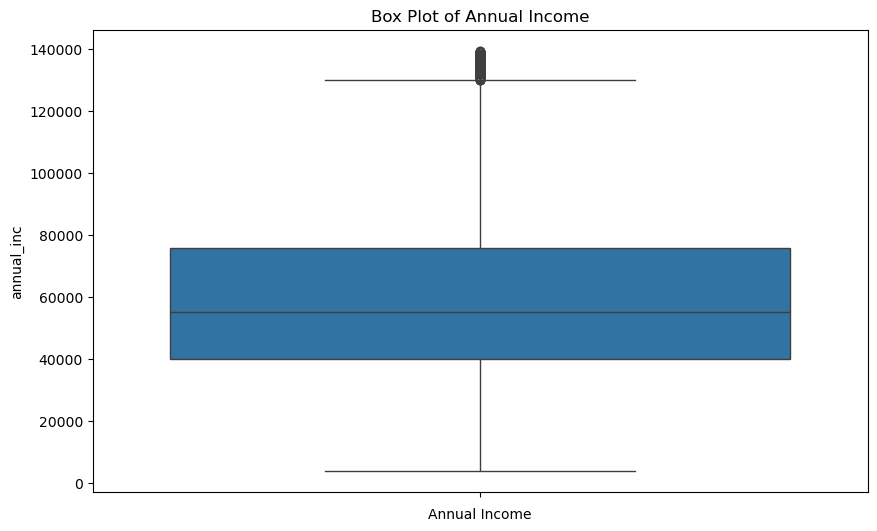

In [196]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [197]:
loan_df['annual_inc']

0        24000.0
1        30000.0
2        12252.0
3        49200.0
4        36000.0
          ...   
33950    35000.0
33951    63500.0
33952    39000.0
33953    40000.0
33954    36153.0
Name: annual_inc, Length: 33955, dtype: float64

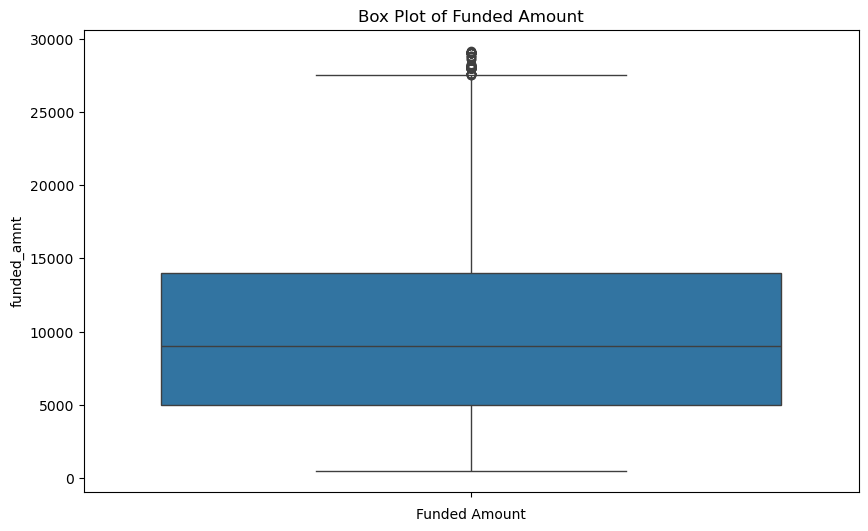

In [198]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['funded_amnt'])
plt.title('Box Plot of Funded Amount')
plt.xlabel('Funded Amount')
plt.show()

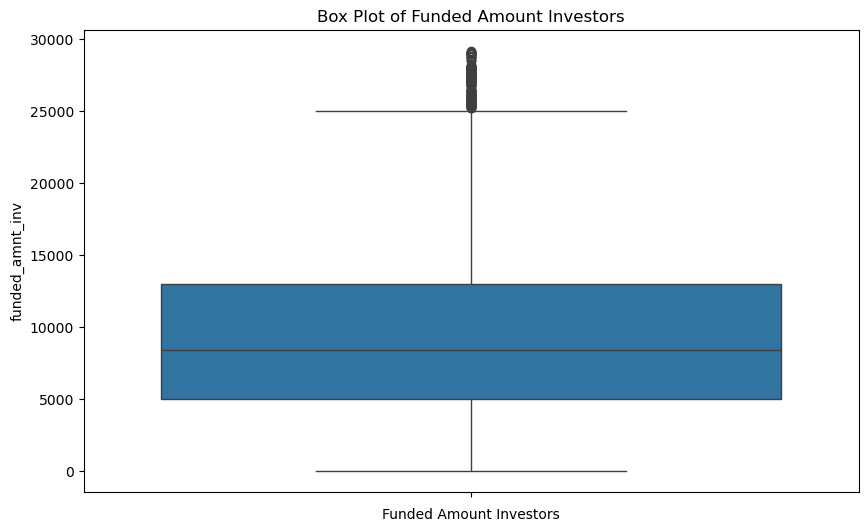

In [199]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['funded_amnt_inv'])
plt.title('Box Plot of Funded Amount Investors')
plt.xlabel('Funded Amount Investors')
plt.show()

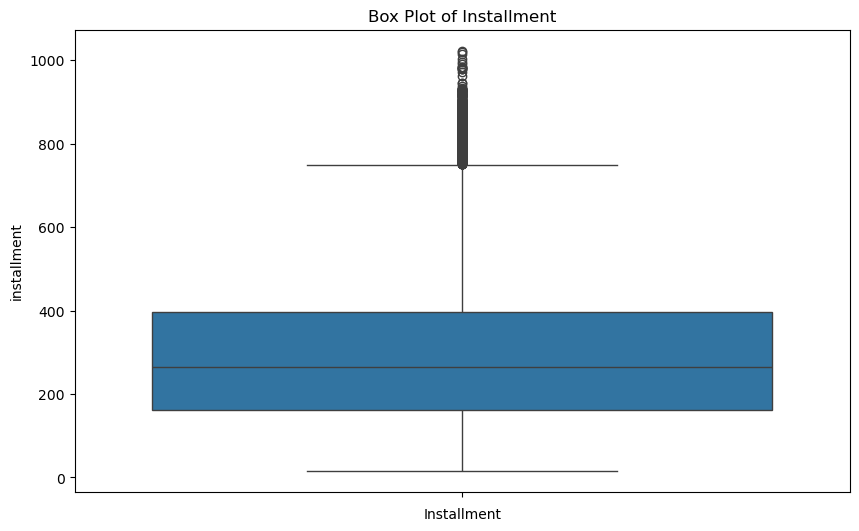

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_df['installment'])
plt.title('Box Plot of Installment')
plt.xlabel('Installment')
plt.show()

# Univariate Analysis

In [203]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_month',
       'issue_year', 'loan_amnt_bucket', 'int_rate_b', 'dti_bucket'],
      dtype='object')

**Inference:** Defaulted loan are low in numbers compared to Fully Paid.

### Statistics on Numerical Variables

##### List of numerical variables are 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'

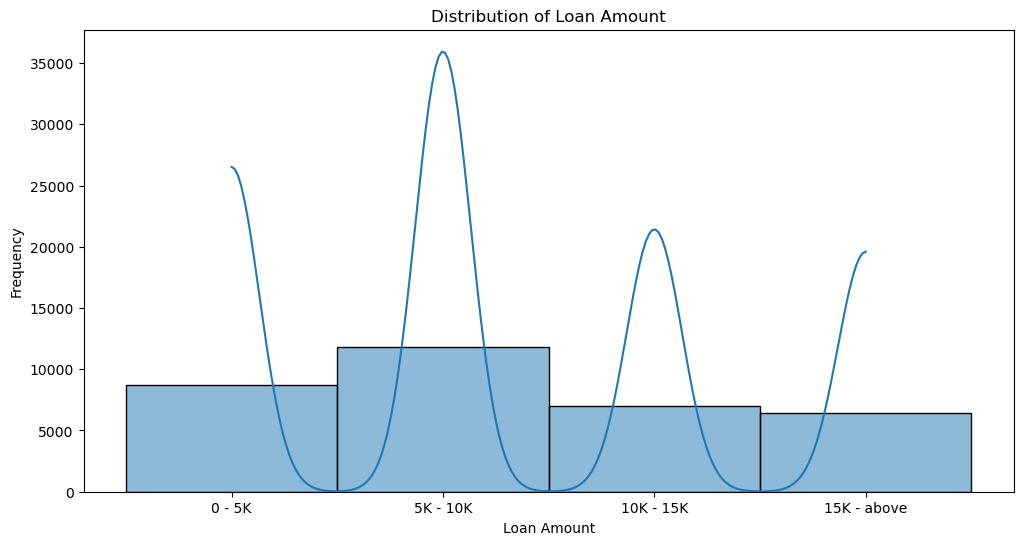

In [207]:
# 1. Univariate Analysis for 'loan_amnt'
plt.figure(figsize=(12, 6))
sns.histplot(loan_df['loan_amnt_bucket'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

**Inference** : Most of the loan amounts are in the range of 5K to 10K

In [209]:
loan_df['loan_amnt'].describe()

count    33955.000000
mean     10212.280960
std       6237.928473
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14125.000000
max      29175.000000
Name: loan_amnt, dtype: float64

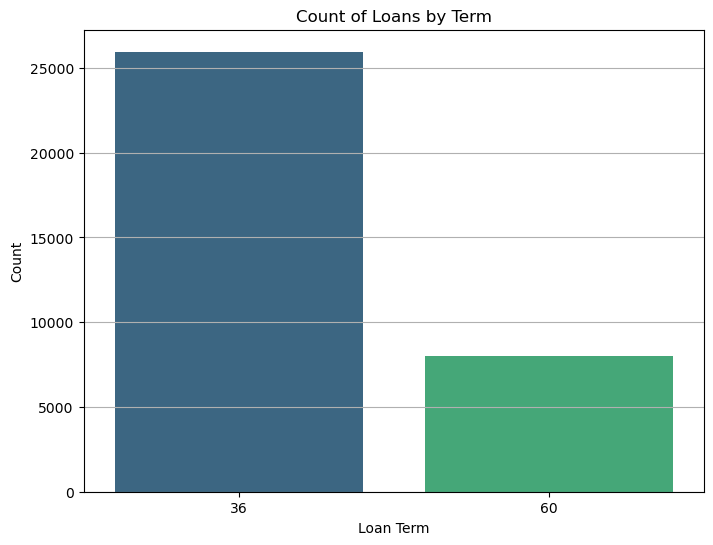

In [210]:
# Plot count of each term
plt.figure(figsize=(8, 6))
sns.countplot(x='term', data=loan_df, palette='viridis')
plt.title('Count of Loans by Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Inference** : Most of the loans are taken for duration of 36 months

In [212]:
loan_df['int_rate'].describe()

count    33955.000000
mean        11.831874
std          3.593530
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         22.110000
Name: int_rate, dtype: float64

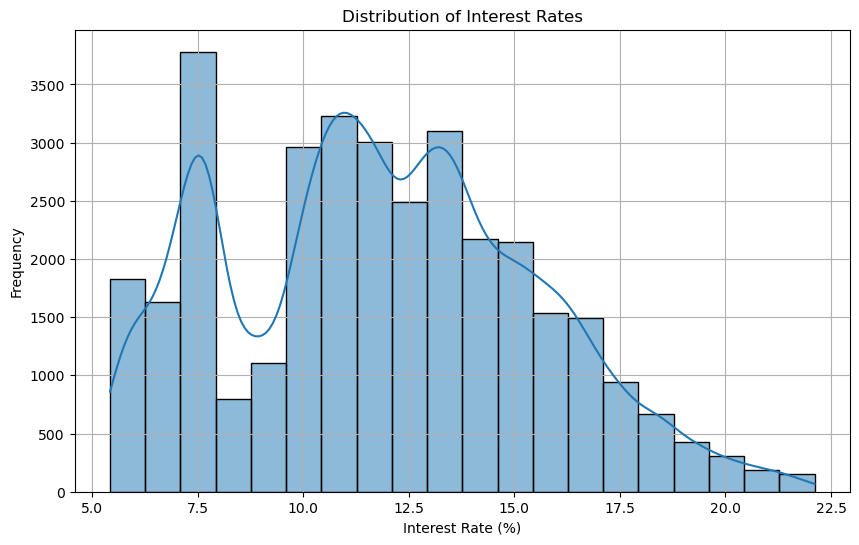

In [213]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['int_rate'], bins=20, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Inference** : The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

## Unordered Categorical Variable Analysis

In [216]:
##### home_ownership, purpose, loan_status, add_state, verification_status, grade

<function matplotlib.pyplot.show(close=None, block=None)>

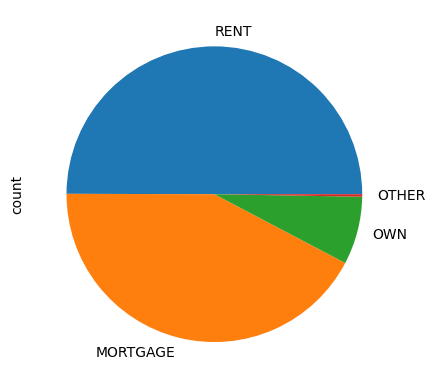

In [217]:
loan_df.home_ownership.value_counts(normalize=False).plot.pie()
plt.show

**Inference** : Majority of borrowsers don't posses property and are on mortage or rent

<function matplotlib.pyplot.show(close=None, block=None)>

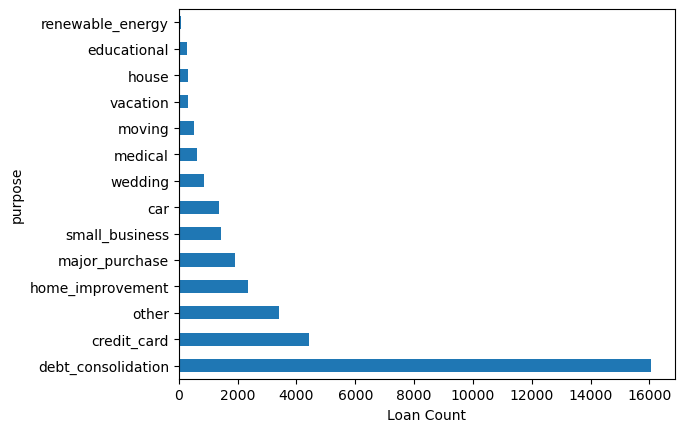

In [219]:
loan_df.purpose.value_counts(normalize=False).plot(kind="barh")
plt.xlabel('Loan Count')
plt.show

**Inference:** A large percentage of loans are taken for debt consolidation followed by credit card.

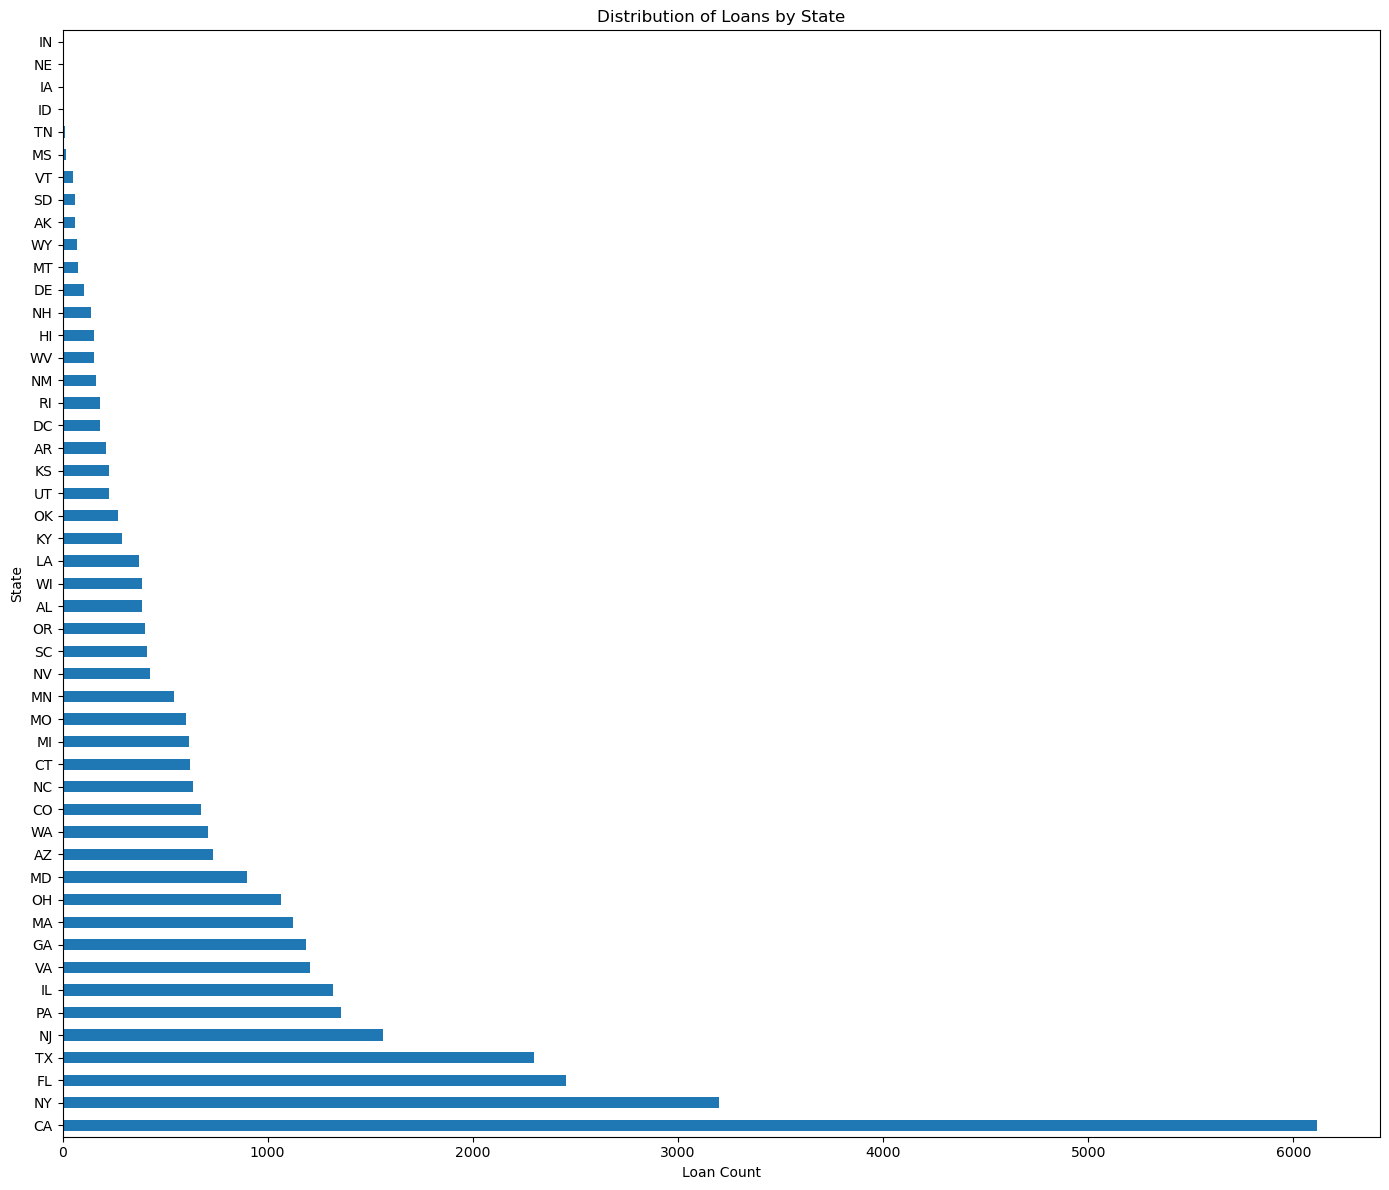

In [221]:
# Assuming 'loan_df' is your DataFrame
state_counts = loan_df['addr_state'].value_counts(normalize=False)

# Create a horizontal bar chart
plt.figure(figsize=(14, 12))  # Adjust figure size as needed
state_counts.plot(kind='barh')  # Create a horizontal bar chart
plt.xlabel('Loan Count')
plt.ylabel('State')
plt.title('Distribution of Loans by State')
plt.tight_layout()  # Improve spacing
plt.show()

**Inference** : Majority of the borrowers are from the large urban cities like california, new york, florida, texas etc.

In [223]:
loan_df['verification_status']

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
              ...       
33950       Not Verified
33951       Not Verified
33952       Not Verified
33953       Not Verified
33954       Not Verified
Name: verification_status, Length: 33955, dtype: object

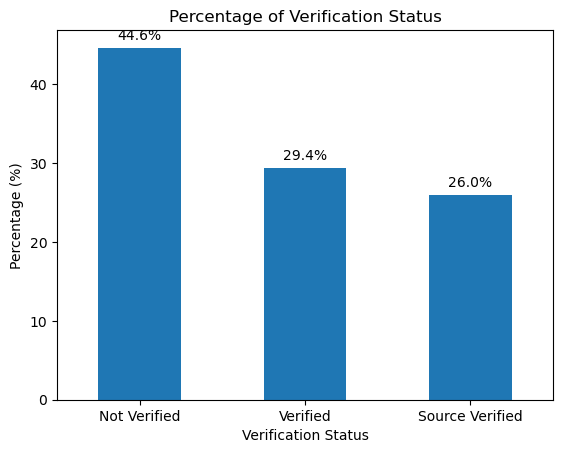

In [227]:
# Calculate the percentage counts of verification_status
verification_counts = loan_df['verification_status'].value_counts(normalize=True) * 100

# Plot the percentages as a vertical bar plot
ax = verification_counts.plot(kind="bar")

# Add titles and labels
plt.title('Percentage of Verification Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Verification Status')
plt.xticks(rotation=0)

# Annotate the bars with the percentage values
for index, value in enumerate(verification_counts):
    ax.text(index, value + 1, f'{value:.1f}%', ha='center')  # Offset the text a bit above the bar

**Inference**: Approx 50% of the borrowers are verified by the company or have source verified.

<Axes: ylabel='grade'>

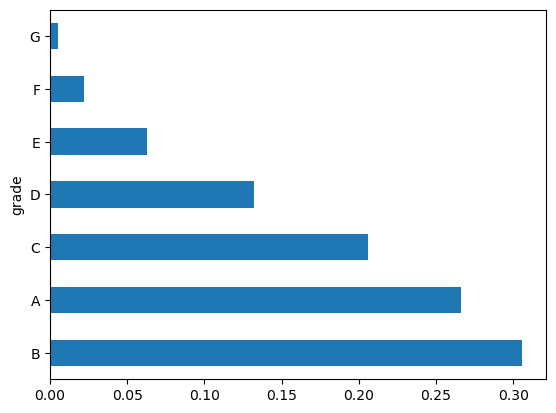

In [230]:
loan_df.grade.value_counts(normalize=True).plot(kind="barh")

**Inference** : A large amount of loans are with grade 'B' and 'A' commpared to rest showing most loans are high grade loans.

In [232]:
loan_df.loan_status.value_counts(normalize=True)

loan_status
Fully Paid     0.85793
Charged Off    0.14207
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

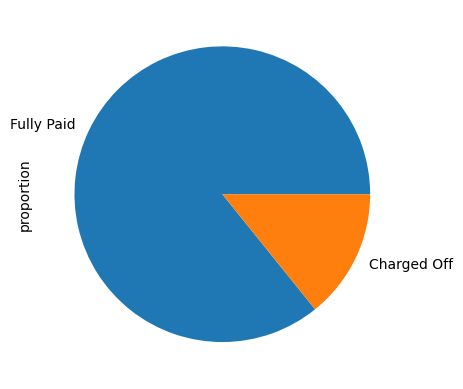

In [233]:
loan_df.loan_status.value_counts(normalize=True).plot.pie()
plt.show

**Inference**: Defaulted loan are low in numbers compared to Fully Paid.

### Ordered Categorical Variable Analysis

In [237]:
loan_df['emp_length'].value_counts(normalize=True)

emp_length
10.0    0.217081
0.0     0.120336
2.0     0.116478
3.0     0.108497
4.0     0.090620
5.0     0.086291
1.0     0.085496
6.0     0.058489
7.0     0.046326
8.0     0.037491
9.0     0.032896
Name: proportion, dtype: float64

Text(0.5, 0, 'Employment Length')

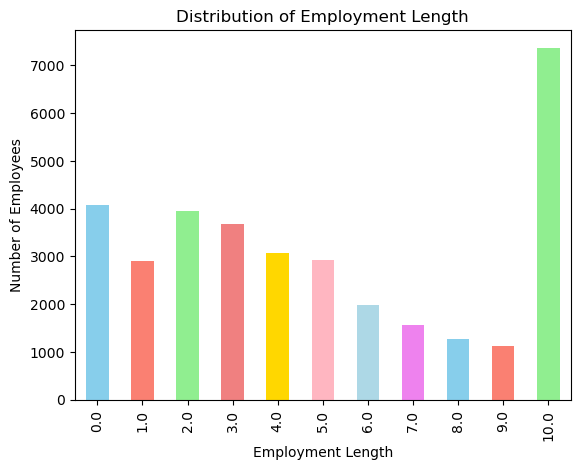

In [238]:
# Count the occurrences of each employment length
emp_length_counts = loan_df['emp_length'].value_counts()

# Sort the index to ensure proper order (if necessary)
emp_length_counts = emp_length_counts.sort_index()

# Define a list of colors for each category (you can customize this)
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightblue', 'violet']

# Plot the counts as a vertical bar plot with different colors
ax = emp_length_counts.plot(kind="bar", color=colors[:len(emp_length_counts)])  # Ensure colors match the number of categories

# Add titles and labels
plt.title('Distribution of Employment Length')
plt.ylabel('Number of Employees')
plt.xlabel('Employment Length')

**Inference:** Majority of borrowsers have working experience greater than 10 years.

Text(0.5, 0, 'Number of Public Record Bankruptcies')

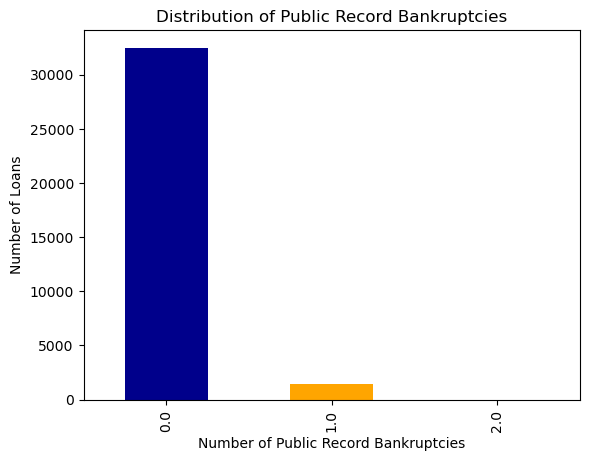

In [244]:
# Count the occurrences of each unique value in pub_rec_bankruptcies
pub_rec_counts = loan_df['pub_rec_bankruptcies'].value_counts()

# Sort the index to ensure proper order
pub_rec_counts = pub_rec_counts.sort_index()

# Define a list of colors for each category (you can customize this)
colors = ['darkblue', 'orange', 'lightgreen']

# Plot the counts as a vertical bar plot with different colors
ax = pub_rec_counts.plot(kind="bar", color=colors[:len(pub_rec_counts)])  # Ensure colors match the number of categories

# Add titles and labels
plt.title('Distribution of Public Record Bankruptcies')
plt.ylabel('Number of Loans')
plt.xlabel('Number of Public Record Bankruptcies')


**Inference** : Majority of the borrowers have no record of Public Recorded Bankruptcy.

Text(0.5, 1.0, 'Distribution of Annual Income')

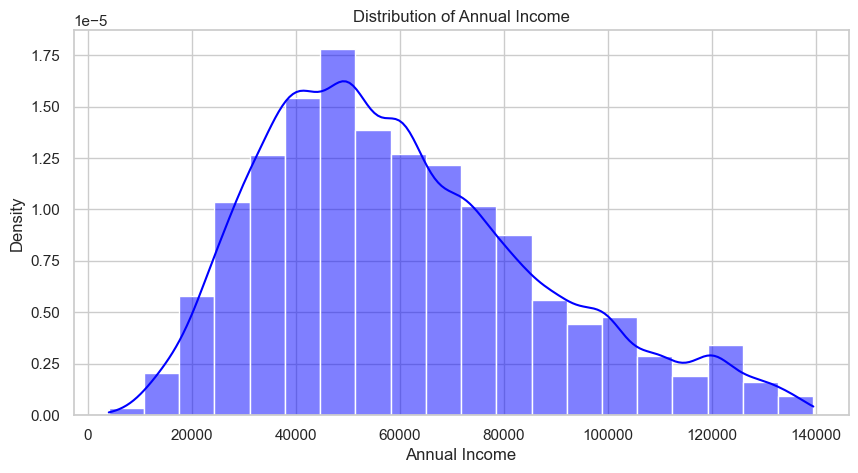

In [246]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure for the distribution of annual_inc
plt.figure(figsize=(10, 5))

# Plot the histogram with KDE
sns.histplot(loan_df['annual_inc'], kde=True, bins=20, stat='density', color='blue')

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income', fontsize=12)

**Inference**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.
.

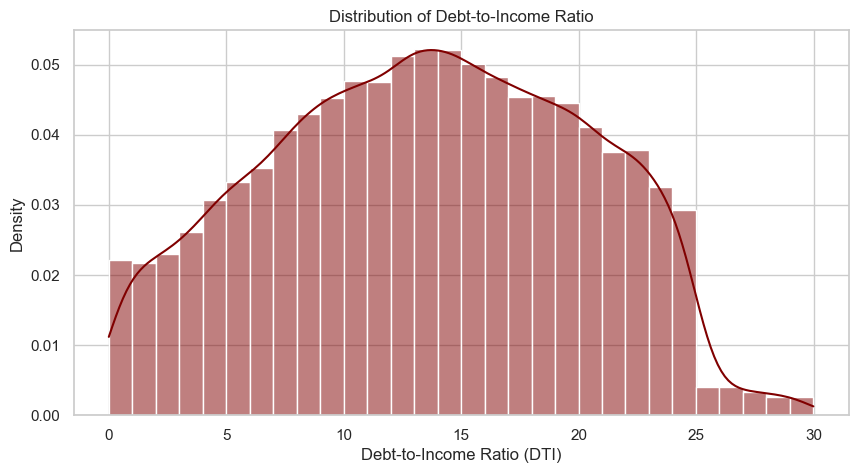

In [248]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure for the distribution of dti
plt.figure(figsize=(10, 5))

# Plot the histogram with KDE
sns.histplot(loan_df['dti'], kde=True, bins=30, stat='density', color='maroon')

# Add labels and title
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Density')
plt.title('Distribution of Debt-to-Income Ratio', fontsize=12)

# Show the plot
plt.show()

**Inference**: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

# Bivariate Analysis
## Categorical Variables

### Ordered Categorical Variables (Ordinal)
- **term**
- **grade**
- **emp_length**

### Unordered Categorical Variables (Nominal)
- **home_ownership**
- **purpose**
- **addr_state**
- **issue_month**
- **issue_year**
- **verification_status**

## Quantitative Variables

### Continuous
- **loan_amnt**
- **int_rate**
- **annual_inc**
- **dti**

### Discrete
- **pub_rec_bankruptcies**

## Ordered Categorical Variables 

In [253]:
# Create a count of loan_status for each grade
status_counts = loan_df.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)

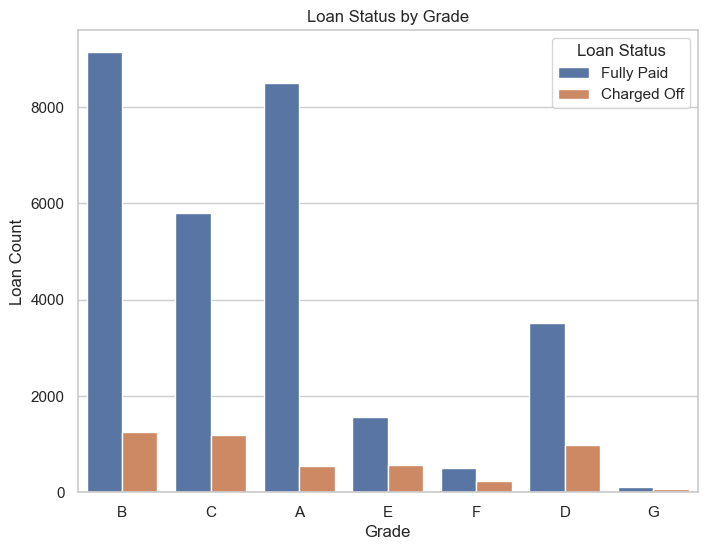

In [254]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_df, x='grade', hue='loan_status')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Count')
plt.legend(title='Loan Status')
plt.show()

**Inference**: The loan status for grades B, C, A, and D have a large number of fully paid loans than charged off loans. The loan status for grades E, F, and G have a large number of charged off loans than fully paid loans.

In [259]:
status_counts = loan_df.groupby(['term', 'loan_status']).size().unstack(fill_value=0)

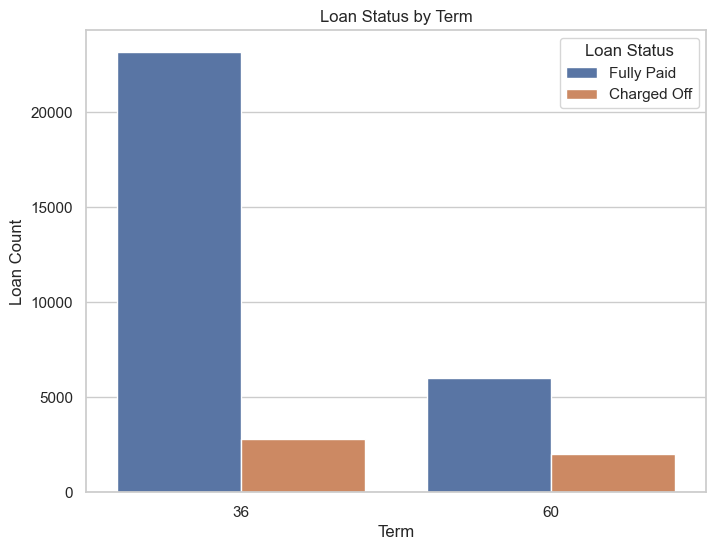

In [260]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_df, x='term', hue='loan_status')
plt.title('Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Loan Count')
plt.legend(title='Loan Status')
plt.show()

**Inference**: The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

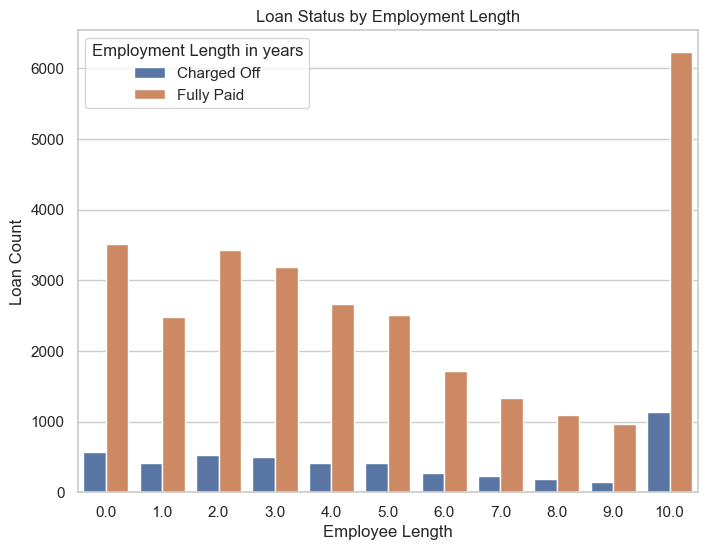

In [262]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_df, x='emp_length', hue='loan_status')
plt.title('Loan Status by Employment Length')
plt.xlabel('Employee Length')
plt.ylabel('Loan Count')
plt.legend(title='Employment Length in years')
plt.show()

**Inference**: The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

# Unordered Categorical Variable

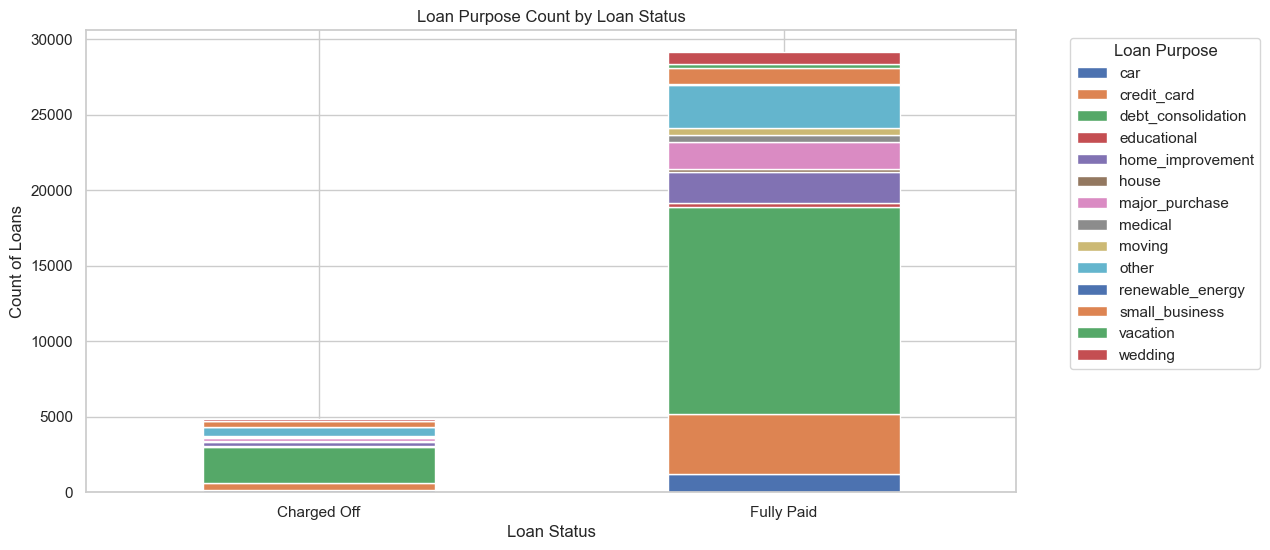

In [266]:
# Group by 'loan_status' and 'purpose', then count the occurrences
status_purpose_counts = loan_df.groupby(['loan_status', 'purpose']).size().unstack(fill_value=0)

# Plotting the results
status_purpose_counts.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Loan Purpose Count by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

**Inference** : Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

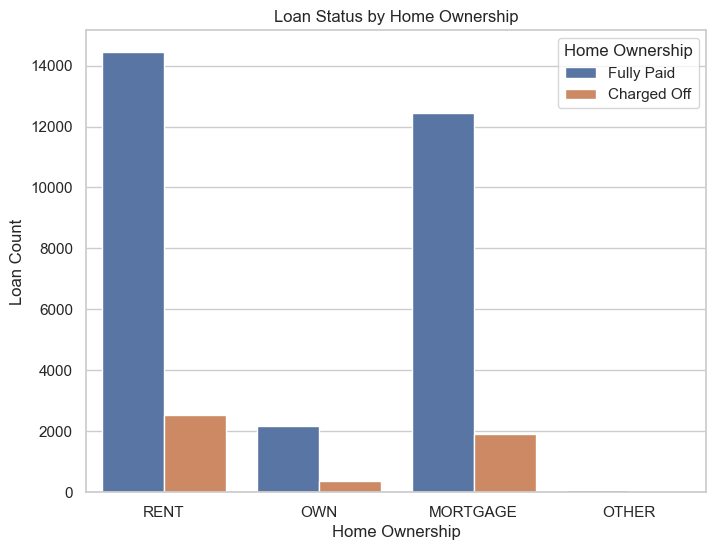

In [269]:
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_df, x='home_ownership', hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Count')
plt.legend(title= 'Home Ownership')
plt.show()

**Inference**: The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

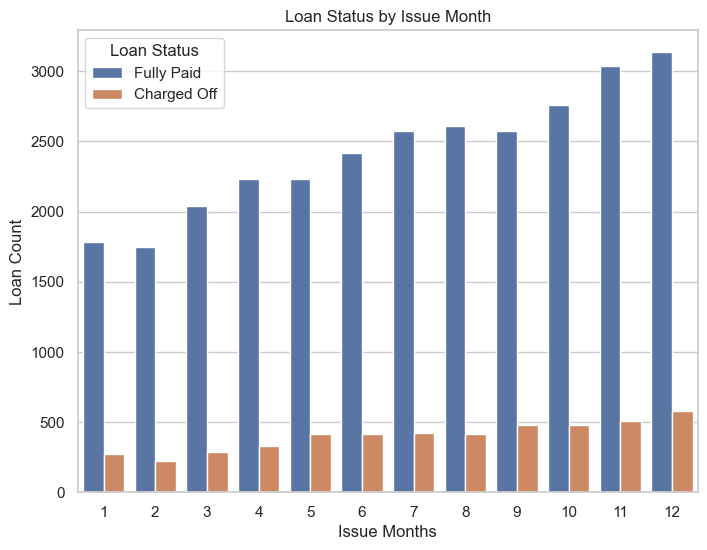

In [271]:
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_df, x='issue_month', hue='loan_status')
plt.title('Loan Status by Issue Month')
plt.xlabel('Issue Months')
plt.ylabel('Loan Count')
plt.legend(title='Loan Status')
plt.show()

**Inference**: Majority of the loans are given in last quarter of the year.

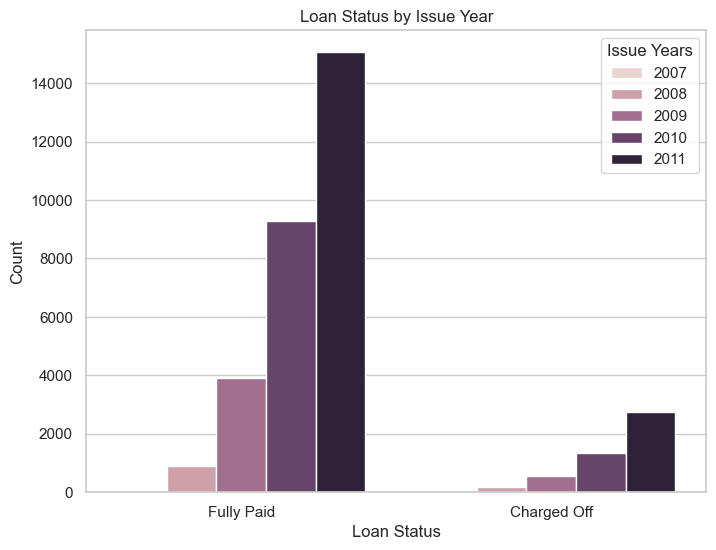

In [273]:
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_df, x='loan_status', hue='issue_year')
plt.title('Loan Status by Issue Year')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Issue Years')
plt.show()

**Inference**: The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

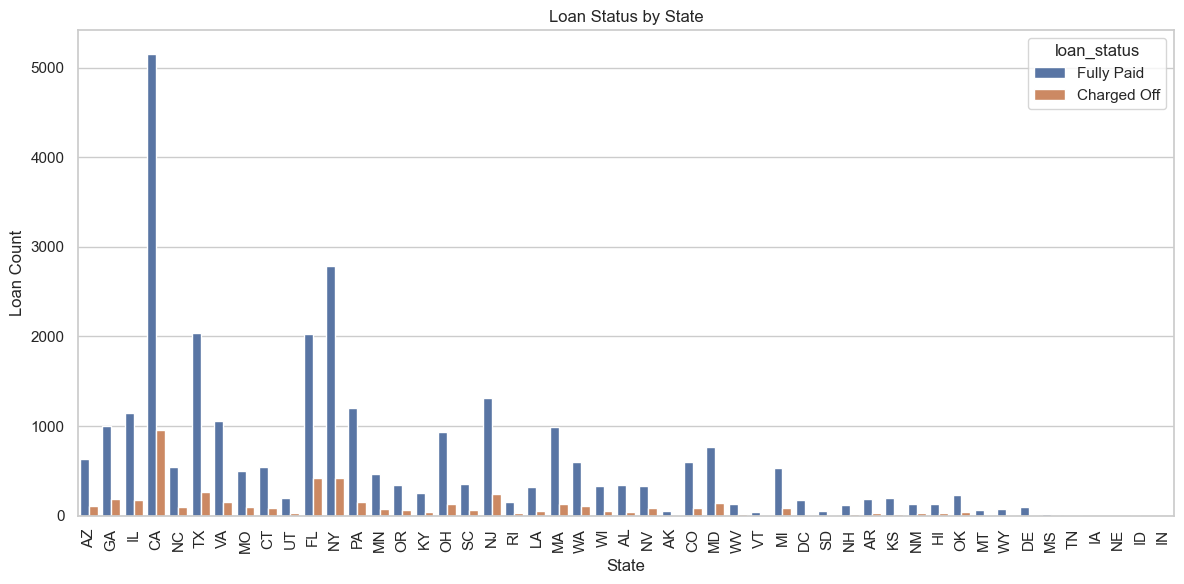

In [275]:
# Set the figure size (width, height)
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create a countplot to visualize the relationship
sns.countplot(x='addr_state', hue='loan_status', data=loan_df)

# Set title and labels for the plot
plt.title('Loan Status by State')
plt.xlabel('State')
plt.ylabel('Loan Count')

# Adjust layout for better visualization
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

**Inference**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

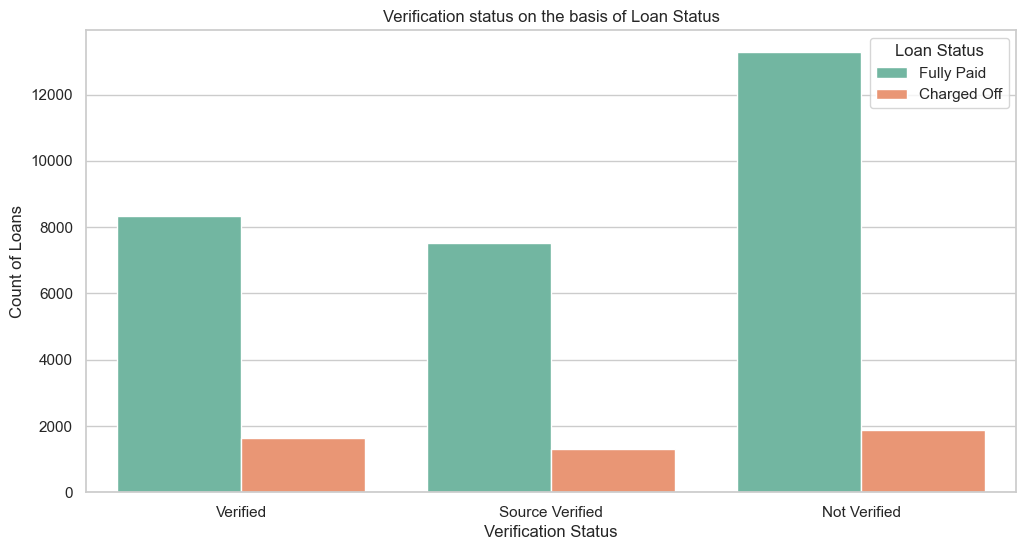

In [277]:
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_df, x='verification_status', hue='loan_status', palette='Set2')
plt.title('Verification status on the basis of Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.show()

## Quantitative Variables

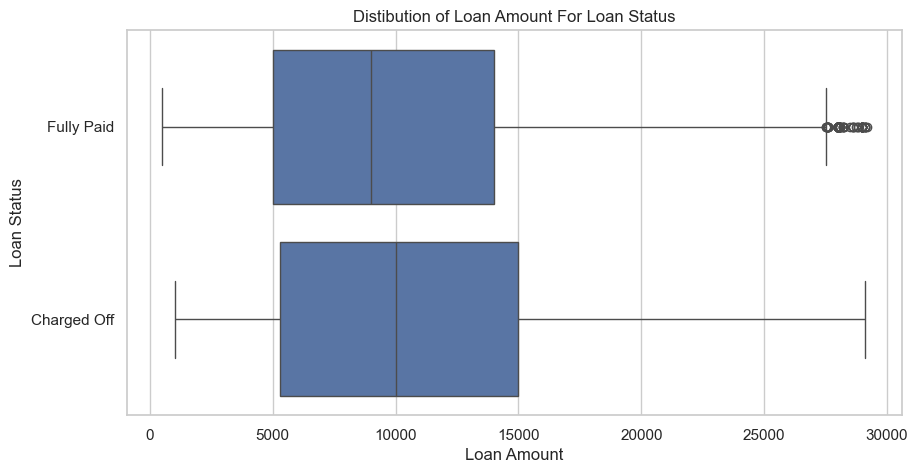

In [283]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

**Inference**: The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

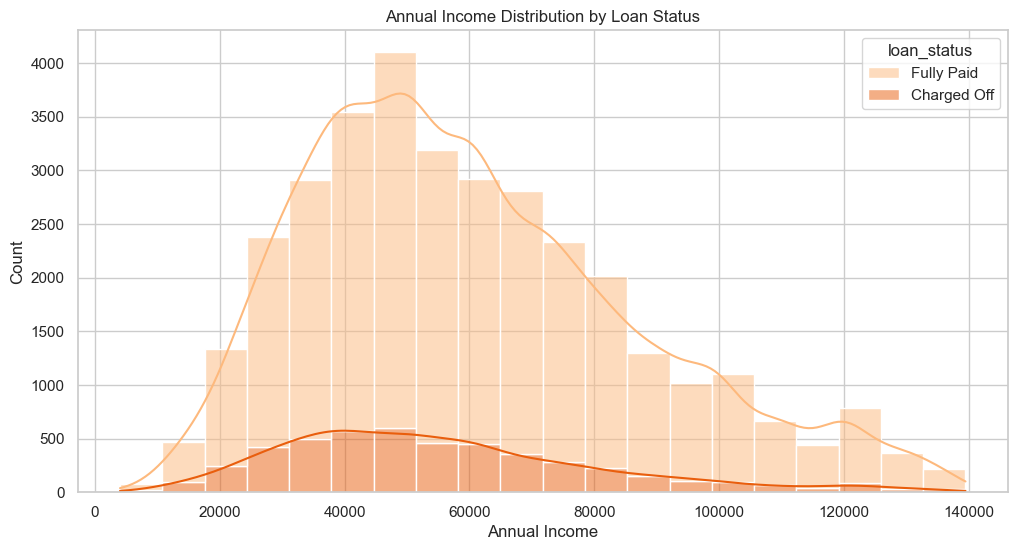

In [285]:
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_df, x='annual_inc', hue='loan_status', multiple='stack', bins=20, palette='Oranges', kde=True)
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

**Inference**: Burrowers with less 60000 annual income are more likely to default and higher annual income are less likely to default.

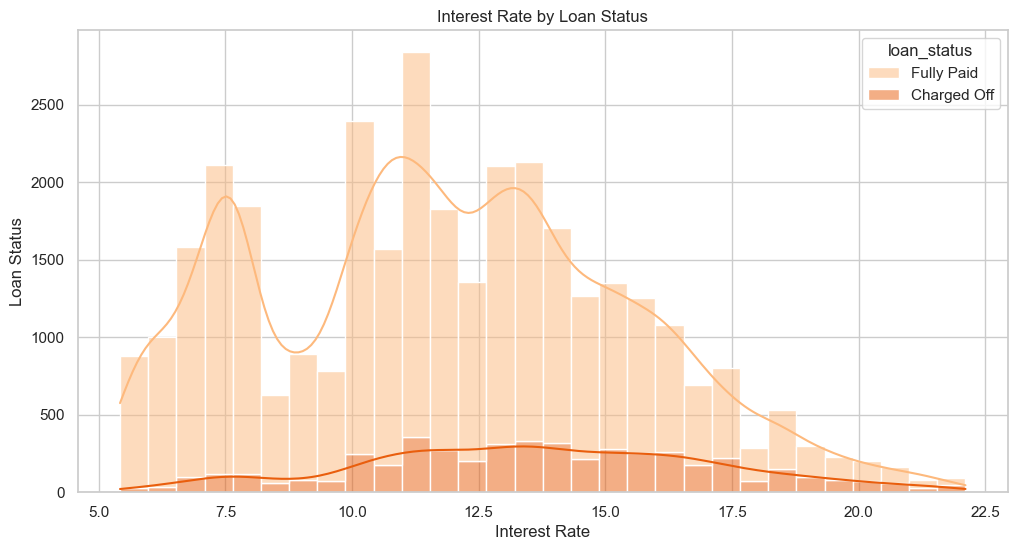

In [287]:
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_df, x='int_rate', hue='loan_status', multiple='stack', bins=30, palette='Oranges', kde=True)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.show()

**Inference**: The default loan count increases with interest rate as it increase from 10% and shows a decline after 17.5 % interest rate.

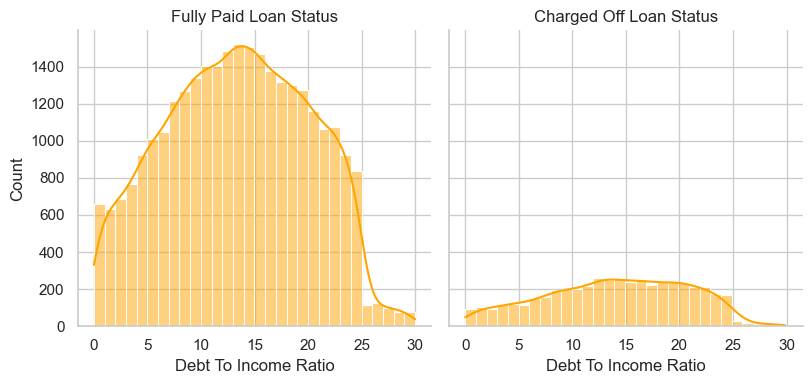

In [291]:
g = sns.FacetGrid(loan_df, col='loan_status', col_wrap=3, height=4)
g.map(sns.histplot, 'dti', bins=30, kde=True, color='orange')
g.set_titles(col_template="{col_name} Loan Status")
g.set_axis_labels('Debt To Income Ratio', 'Count')
plt.show()

**Inference** : The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan as higher dti has higher chance of defaulting.

In [294]:
loan_df['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

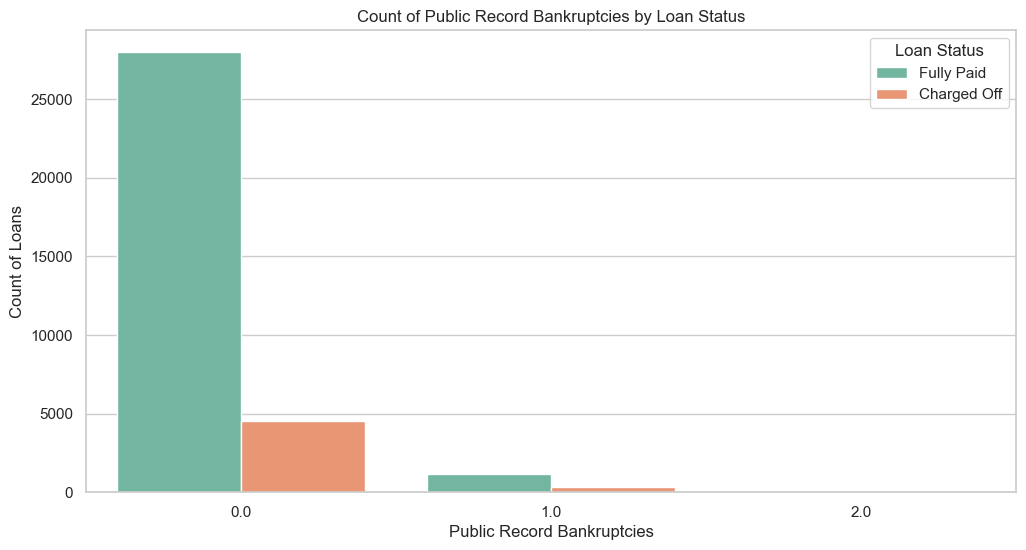

In [296]:
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_df, x='pub_rec_bankruptcies', hue='loan_status', palette='Set2')
plt.title('Count of Public Record Bankruptcies by Loan Status')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.show()

**Inference**: The borrowers with no bankruptcy history are more likely to repay their loans.

## Correlation Analysis

In [300]:
# Selecting specific columns for correlation analysis
correlation_df = loan_df[['installment', 'funded_amnt', 'loan_amnt', 'funded_amnt_inv', 'term', 'dti', 'emp_length', 'pub_rec_bankruptcies', 'annual_inc']]


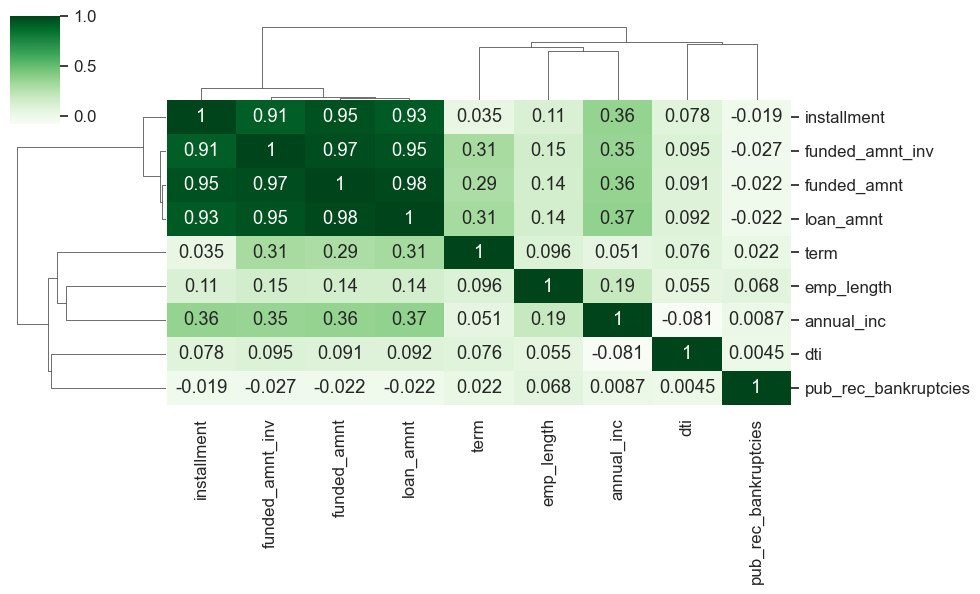

In [326]:
corr = correlation_df.corr()
sns.set(font_scale=1.1)

sns.clustermap(corr, annot=True, figsize=(10, 6), cmap="Greens")
plt.show()

# Inferences from Correlation Metrics

## Strong Correlation
- **installment** has a strong correlation with **funded_amnt**, **loan_amnt**, and **funded_amnt_inv**.
- **term** has a strong correlation with **interest rate**.
- **annual_inc** has a strong correlation with **loan_amount**.

## Weak Correlation
- **dti** has weak correlation with most of the fields.
- **emp_length** has weak correlation with most of the fields.

## Negative Correlation
- **pub_rec_bankrupticies** has a negative correlation with almost every field.
- **annual_inc** has a negative correlation with **dti**.

# Multivariate Analysis

1. Loan Amount, Interest Rate, and Term: To analyze how these three variables interact and their combined effect on default rates.
2. Annual Income, DTI, and Employment Length: To assess how these factors together influence a borrower's ability to repay.
3. Grade, Verification Status, and Public Records: To analyze how these factors correlate with default rates to understand the impact of creditworthiness and financial history.

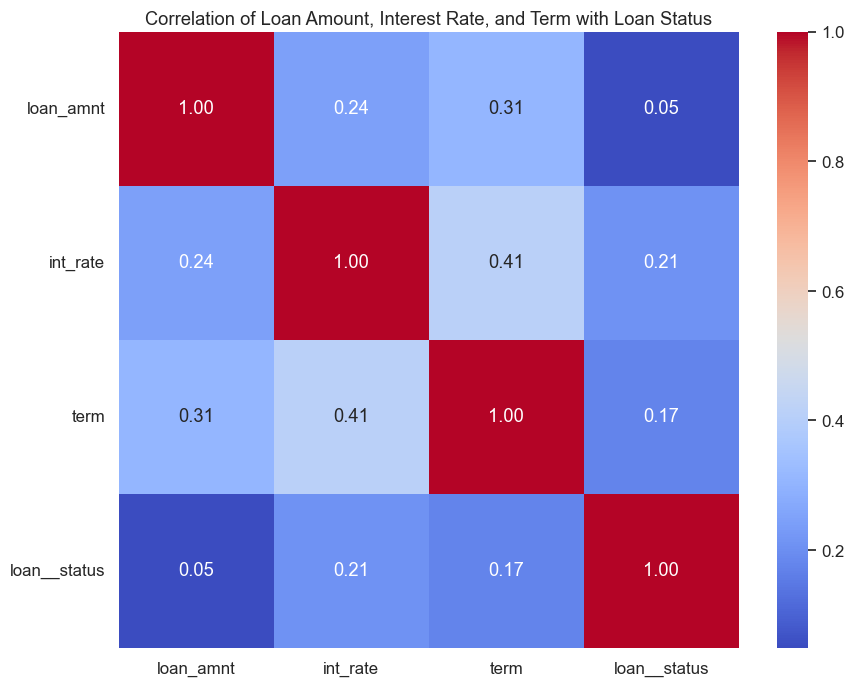

In [306]:
# Convert loan_status to numerical values
loan_df2 = loan_df.copy()
loan_df2['loan__status'] = loan_df2['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Select relevant features for correlation
correlation_features = loan_df2[['loan_amnt', 'int_rate', 'term', 'loan__status']]

# Calculate correlation matrix
correlation_matrix = correlation_features.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Loan Amount, Interest Rate, and Term with Loan Status')
plt.yticks(rotation=0)
plt.show()

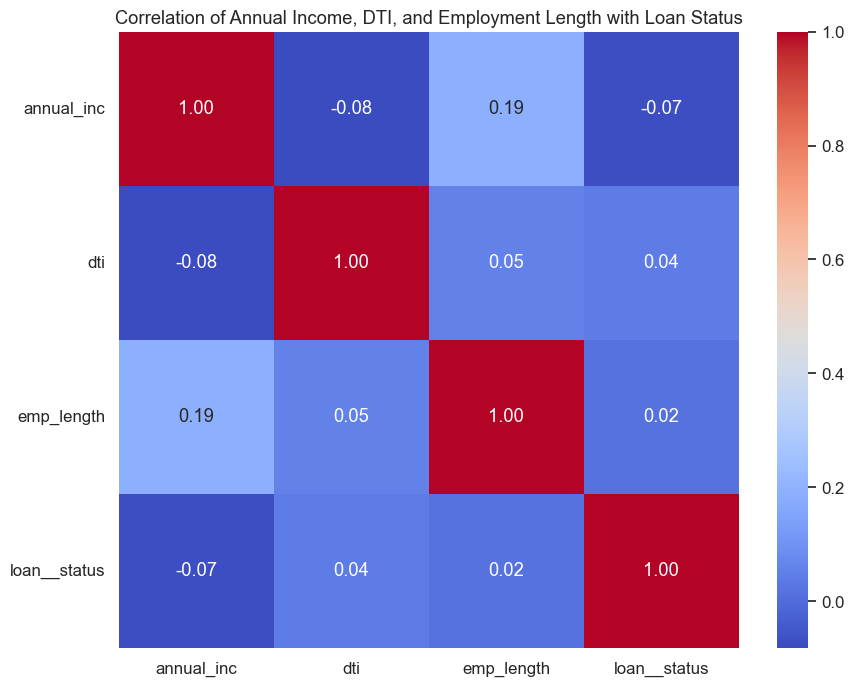

In [308]:
# Select relevant features for correlation
correlation_features = loan_df2[['annual_inc', 'dti', 'emp_length', 'loan__status']]

# Calculate correlation matrix
correlation_matrix = correlation_features.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Annual Income, DTI, and Employment Length with Loan Status')
plt.yticks(rotation=0)
plt.show()

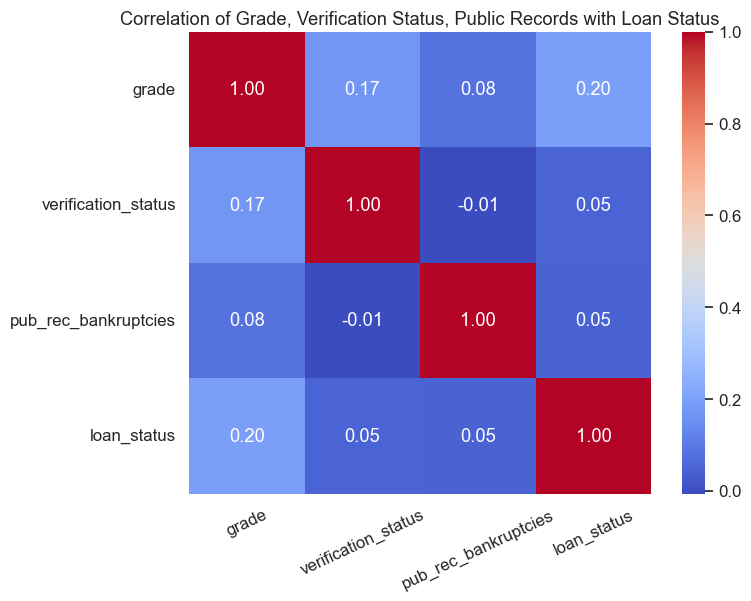

In [310]:
# Convert 'grade' and 'verification_status' to categorical types
loan_df['grade'] = loan_df['grade'].astype('category')
loan_df['verification_status'] = loan_df['verification_status'].astype('category')

# Create a new DataFrame for the relevant columns
loans_grade_verification = loan_df[['grade', 'verification_status', 'pub_rec_bankruptcies', 'loan_status']].copy()

# Convert categorical variables to numerical for visualization
loans_grade_verification['grade'] = loans_grade_verification['grade'].cat.codes
loans_grade_verification['verification_status'] = loans_grade_verification['verification_status'].cat.codes
loans_grade_verification['loan_status'] = loans_grade_verification['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Calculate correlation matrix
correlation_matrix = loans_grade_verification.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation of Grade, Verification Status, Public Records with Loan Status')
plt.xticks(rotation=25)
plt.show()

# Key Insights from Univariate Analysis

1. **Loan Status**: 
   - Defaulted loans are fewer in number compared to fully paid loans.

2. **Loan Amounts**: 
   - Most loan amounts fall within the 5,000 to 10,000 range.

3. **Loan Duration**: 
   - The majority of loans are for a duration of 36 months.

4. **Interest Rates**: 
   - Interest rates are concentrated around 5-10% and 10-15%, with a notable drop near 10%.

5. **Property Ownership**: 
   - Most borrowers do not own property and are either mortgaged or renting.

6. **Loan Purpose**: 
   - A significant percentage of loans are for debt consolidation, followed by credit card payments.

7. **Borrower Demographics**: 
   - Most borrowers are from large urban areas such as California, New York, Florida, and Texas.

8. **Verification Status**: 
   - Approximately 50% of borrowers are verified by the company or have source verification.

9. **Loan Grades**: 
   - A large number of loans are graded 'B' and 'A', indicating a predominance of high-grade loans.

10. **Work Experience**: 
    - Most borrowers have over 10 years of work experience.

11. **Bankruptcy History**: 
    - The majority of borrowers have no record of public recorded bankruptcy.

12. **Income Distribution**: 
    - Annual income exhibits a left-skewed normal distribution, indicating many borrowers have low income relative to others.

13. **Debt-to-Income Ratio**: 
    - Most borrowers have high debt compared to their registered income, particularly concentrated in the 10-15 DTI ratio.

# Key Insights on Loan Status by Bivariate Analysis

1. **Loan Status by Grade**: 
   - Grades B, C, A, and D have more fully paid loans than charged off loans, while grades E, F, and G show the opposite trend.

2. **Loan Term and Default Risk**: 
   - 60-month loans are more likely to default compared to 36-month loans, which have a higher rate of full repayment.

3. **Employee Experience and Loan Repayment**: 
   - Employees with over 10 years of experience are more likely to default, yet also have a significant chance of fully repaying their loans.

4. **Loan Purpose**: 
   - Debt consolidation is the most common loan purpose, with the highest numbers of both fully paid and defaulted loans.

5. **Property Ownership and Default Rates**: 
   - Borrowers who own their property have lower default rates compared to those with mortgages or renting.

6. **Loan Issuance Timing**: 
   - The majority of loans are issued in the last quarter of the year (September to December).

7. **Trends in Loan Repayment**: 
   - Fully paid loans are increasing exponentially over time, unlike defaulted loans.

8. **Borrower Demographics**: 
   - Most borrowers are from large urban areas such as California, New York, Texas, and Florida.

9. **Loan Amount and Default Risk**: 
   - Defaulted loans show a larger 75th percentile compared to fully paid loans, indicating that larger loan amounts have a higher chance of defaulting.

10. **Income and Default Probability**: 
    - Borrowers with annual incomes below $60,000 are more likely to default, while those with higher incomes are less likely to do so.

11. **Interest Rate Impact**: 
    - Default loan counts rise with interest rates up to 17.5%, after which they decline.

12. **DTI Ratio and Loan Status**: 
    - Loans with a DTI ratio of 10-15 have a higher number of defaulted loans, indicating that higher DTI ratios correlate with increased default risk.

13. **Bankruptcy History and Loan Repayment**: 
    - Borrowers with no history of bankruptcy are more likely to repay their loans.

# Key Insights on Loan Status by Multivariate Analysis

1. **Interest Rates and Charge-Offs**: 
   - Higher interest rates are slightly correlated with a greater proportion of charged-off loans.

2. **Loan Term and Default Risk**: 
   - **36-Month Loans**: Majority are fully paid.
   - **60-Month Loans**: Majority are charged off.
   - **Conclusion**: Longer loan terms are linked to higher default risk.

3. **Predictors of Loan Status**: 
   - Loan term is the strongest predictor of loan status, with longer terms leading to more charge-offs.
   - Loan amount and interest rate also play a role, but to a lesser extent.

4. **Borrower Characteristics**: 
   - **Income**: Higher annual income correlates with a greater likelihood of loan repayment.
   - **Employment Length**: Borrowers with longer employment (peaking around 8 years) are more likely to repay their loans, indicating lower risk.

5. **Creditworthiness**: 
   - Higher-grade loans (better creditworthiness) are more likely to be fully paid, while lower-grade loans have a higher chatu6 and loan outcomes.

7. **Public Record Bankruptcies**: 
   - Borrowers without public record bankruptcies are more likely to face charge-offs.